<a href="https://colab.research.google.com/github/nmshafie1993/detect_yoga_pose/blob/master/Yoga_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
#loading the Libraries
import math, re, os
import numpy as np
import pandas as pd
import tensorflow as tf
import pathlib
import PIL
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
import tensorflow.keras.layers.experimental.preprocessing as preprocessing
import shutil

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.0


In [133]:
shutil.rmtree('/content/detect_yoga_pose')

In [134]:
#cloning the data from github
!git clone "https://github.com/nmshafie1993/detect_yoga_pose.git"

Cloning into 'detect_yoga_pose'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 1240 (delta 12), reused 31 (delta 10), pack-reused 1204
Receiving objects: 100% (1240/1240), 136.65 MiB | 44.16 MiB/s, done.
Resolving deltas: 100% (157/157), done.


In [135]:
ds_train_ = image_dataset_from_directory(
    '/content/detect_yoga_pose/Train_Set',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    '/content/detect_yoga_pose/Test_Set',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 868 files belonging to 4 classes.
Found 75 files belonging to 4 classes.


In [137]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [138]:
model = Sequential([
        Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (224,224,3)),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Flatten(),
        Dense(units =128, activation = 'relu'),
        Dense(units =4, activation = 'softmax'),
        
])

In [139]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 200704)            0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               25690240  
_________________________________________________________________
dense_39 (Dense)             (None, 4)               

In [143]:
model.compile(optimizer = Adam (learning_rate = 0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.fit(x = ds_train, 
          validation_data = ds_valid, epochs = 30, 
          verbose = 2)

Epoch 1/30
14/14 - 2s - loss: 0.7101 - accuracy: 0.7512 - val_loss: 0.9537 - val_accuracy: 0.5867
Epoch 2/30
14/14 - 1s - loss: 0.6635 - accuracy: 0.7995 - val_loss: 0.9548 - val_accuracy: 0.6400
Epoch 3/30
14/14 - 1s - loss: 0.6256 - accuracy: 0.8134 - val_loss: 0.9330 - val_accuracy: 0.6533
Epoch 4/30
14/14 - 1s - loss: 0.5977 - accuracy: 0.8272 - val_loss: 0.9296 - val_accuracy: 0.6400
Epoch 5/30
14/14 - 1s - loss: 0.5789 - accuracy: 0.8329 - val_loss: 0.9207 - val_accuracy: 0.6400
Epoch 6/30
14/14 - 1s - loss: 0.5562 - accuracy: 0.8399 - val_loss: 0.9174 - val_accuracy: 0.6400
Epoch 7/30
14/14 - 1s - loss: 0.5385 - accuracy: 0.8410 - val_loss: 0.9199 - val_accuracy: 0.6400
Epoch 8/30
14/14 - 1s - loss: 0.5194 - accuracy: 0.8502 - val_loss: 0.9178 - val_accuracy: 0.6533
Epoch 9/30
14/14 - 1s - loss: 0.5003 - accuracy: 0.8594 - val_loss: 0.9156 - val_accuracy: 0.6533
Epoch 10/30
14/14 - 1s - loss: 0.4985 - accuracy: 0.8583 - val_loss: 0.9276 - val_accuracy: 0.6667
Epoch 11/30
14/14 -

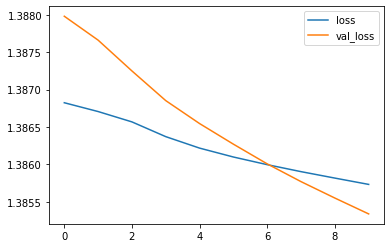

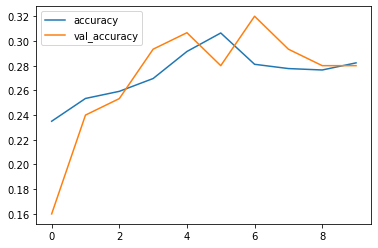

In [144]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();